# Machine Learning Lab

#### Solution by: Nilesh Patel


In [42]:
#import packages

import numpy as np
import pandas as pd
import re
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#loading.csv files into data frame

orders = pd.read_csv('Orders.csv')
returns = pd.read_csv('Returns.csv')

In [44]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [45]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [46]:
column_name = orders.columns
column_name

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [47]:
orders.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [48]:
#CORRELATION

# %matplotlib inline 
# import matplotlib.pyplot as plt
# import seaborn as sns
# corrmat = orders[orders.columns].corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

In [50]:
orders.shape

(51290, 24)

## Part I: Preprocessing and EDA

### Problem 1: Dataset Import & Cleaning
- Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type.

In [51]:
orders['Sales'] = [re.sub('\$|,','',i) for i in orders.Sales]
orders['Sales'] = pd.to_numeric(orders.Sales)

In [52]:
orders['Profit'] = [re.sub('\$|,','',i) for i in orders.Profit]
orders['Profit'] = pd.to_numeric(orders.Profit)

In [53]:
print(orders.Sales.dtype)
print(orders.Profit.dtype)

float64
float64


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

In [54]:
#changing order date into datetime

orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [55]:
#creating two new columns to find seasonal trends

orders['Year'] = orders['Order.Date'].dt.year
orders['Month'] = orders['Order.Date'].dt.month

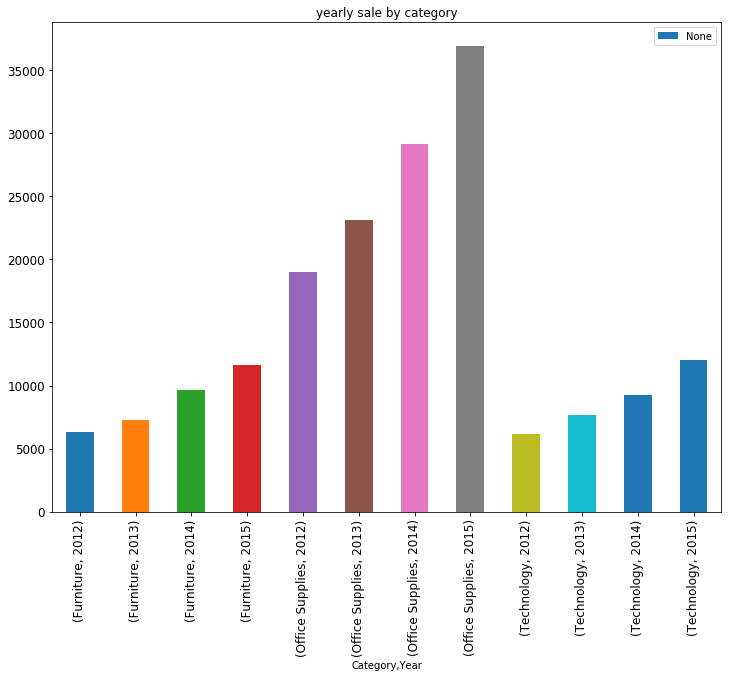

In [56]:
#using groupby to findout number of order by category every year and every month

orders.groupby(['Year','Month'])['Order.ID'].agg('count')

#trend by year
trend_y = orders.groupby(['Year','Category'])['Quantity'].agg('sum')
trend_y.unstack(fill_value=0).unstack(fill_value=0).plot(kind = 'bar', figsize = (12,9),legend = True,title = 'yearly sale by category',fontsize = 12)

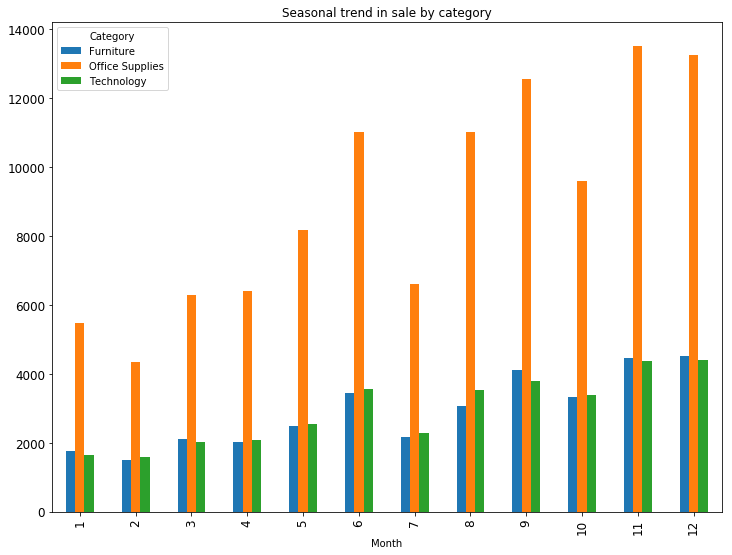

In [57]:
#trend by month
trend_m = orders.groupby(['Month','Category'])['Quantity'].agg('sum')
trend_m.unstack(fill_value=0).plot(kind = 'bar', figsize = (12,9),legend = True,title = 'Seasonal trend in sale by category',fontsize = 12)

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

In [58]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [59]:
#creating another dataframe by merging orders and returns dataframes.

orders_returns = pd.merge(orders,returns, left_on= 'Order.ID', right_on='Order ID') 

In [60]:
orders_returns.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Month,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2,0.0,720.36,725.57,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,153.75,627.27,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,311.85,458.97,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,114.60,203.92,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,68.22,25.48,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia


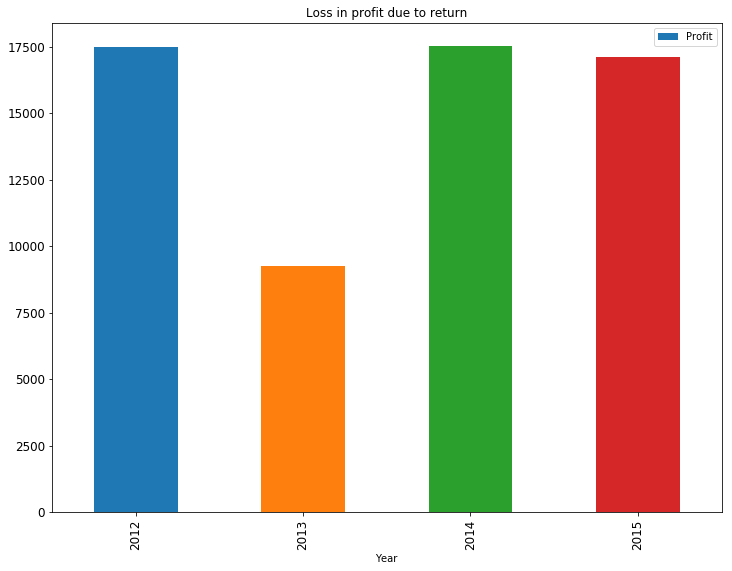

In [61]:
# total profit loss every year due to return:

orders_returns.groupby('Year')['Profit'].agg('sum').plot(kind = 'bar', figsize = (12,9),legend = True,title = 'Loss in profit due to return',fontsize = 12)

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


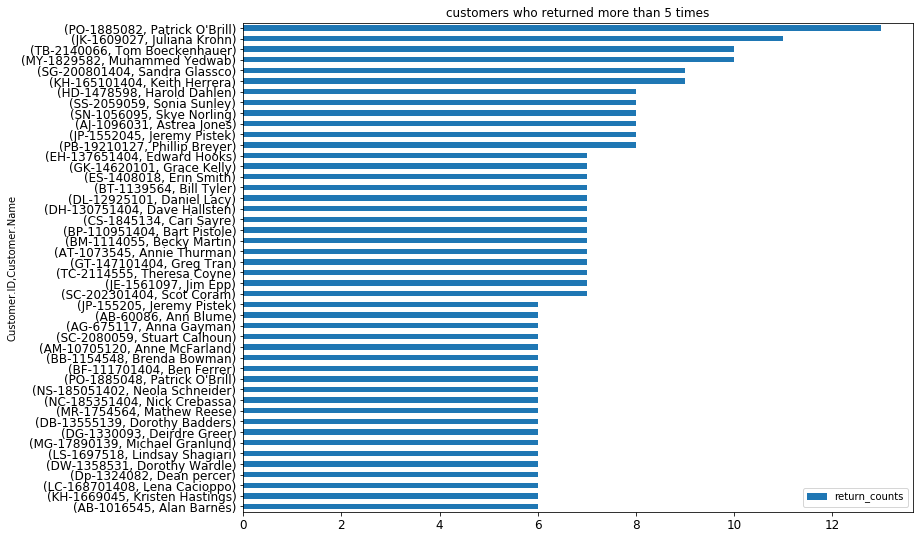

In [62]:
# customer returned more than 5 times

MR_customers=orders_returns.groupby(['Customer.ID','Customer.Name'])['Customer.Name'].agg({'return_counts':'count'})
MR_customers[MR_customers['return_counts']>5].sort_values(by = 'return_counts').plot(kind = 'barh', figsize = (12,9),legend = True,title = 'customers who returned more than 5 times',fontsize = 12)

In [63]:
#orders_returns[orders_returns['Region_x'] != orders_returns['Region_y']]['Region_x']

In [64]:
#returning top region with most returns.

return_by_region = orders_returns.groupby(['Region_y'])['Customer.ID'].agg({'return_counts':'count'})
top_15 = return_by_region.sort_values(by = 'return_counts',ascending=False)

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


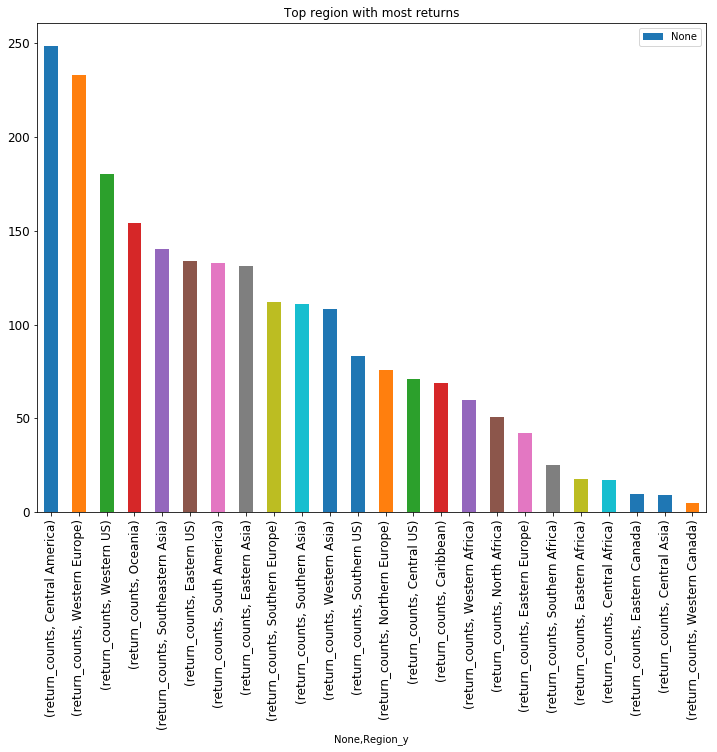

In [65]:
top_15.unstack(fill_value=0).plot(kind = 'bar', figsize = (12,9),legend = True,title = 'Top region with most returns',fontsize = 12)

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


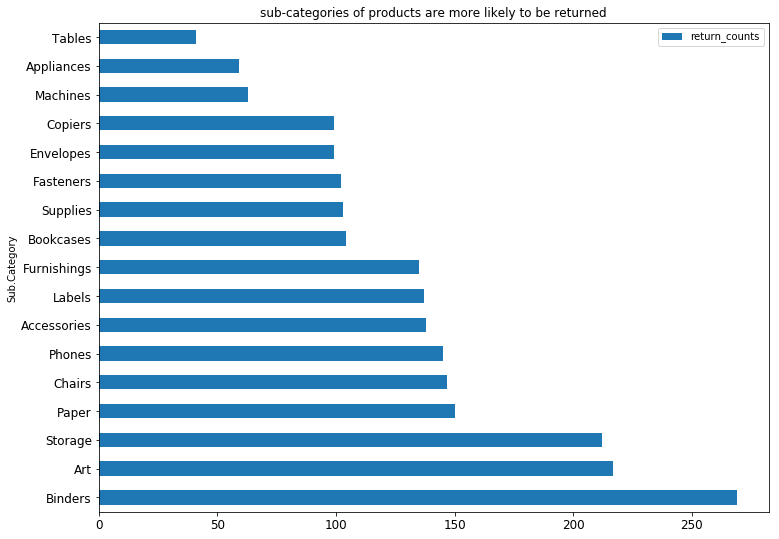

In [66]:
#sub-categories of products are more likely to be returned

return_subcat = orders_returns.groupby('Sub.Category')['Order.ID'].agg({'return_counts':'count'})
return_subcat.sort_values(by= 'return_counts',ascending= False).plot(kind = 'barh', figsize = (12,9),legend = True,title = 'sub-categories of products are more likely to be returned',fontsize = 12)


## Part II: Machine Learning and Business Use Case

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.


In [67]:
#generating a categorical variable which indicates whether an order has been returned or not.

orders['Returned'] = orders['Order.ID'].isin(returns['Order ID'])

In [68]:
#changing ship date into datetime

orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

#how long it took the order to ship and creating a new column process.time, it shows number of days in shipping

orders['Process.Time'] = orders['Ship.Date']-orders['Order.Date']

In [69]:
#average shipping days
np.mean(orders['Process.Time'])

Timedelta('3 days 23:15:53.589393')

In [70]:
# number of order shipped after average shipping days
orders[orders['Process.Time']> '4 days 00:00:00']['Order.ID'].agg('count')

20533

In [71]:
# number of order Returned which shipped after average shipping days
#sum because those are logical values
orders[orders['Process.Time']> '4 days 00:00:00']['Returned'].agg({'return_counts':'sum'})

return_counts    921
Name: Returned, dtype: int64

In [72]:
#out of 20533 only 921 peoples returned orders which are delivered after average shipping days.
#so it is clear that there is no affect of delay shipping on returned orders.

In [73]:
returned_products = orders.groupby(['Sub.Category','Returned'])['Returned'].agg('sum')

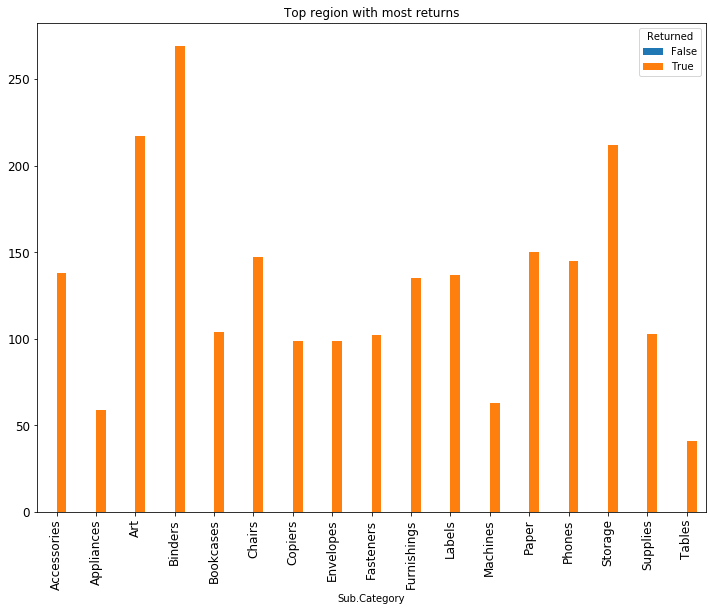

In [74]:
#feature indictes how many times the product has been returned before.

returned_products.unstack(fill_value=0).plot(kind = 'bar', figsize = (12,9),legend = True,title = 'Top region with most returns',fontsize = 12)


### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?

In [75]:
#generating output which shows total number of present values, missing values, unique values and count of unique values for every column.

for i in column_name:
    unique = (orders[i]).unique()
    count = (orders[i]).value_counts()
    length = (orders[i]).count()
    print ('*' * 70,'\n','Length is: ',length,'\n',"Missing values:",\
           (51290- length),'\n',"Unique Values are:",unique, '\n','Unique Values Count:',"\n",count,'\n', '*' * 80)

********************************************************************** 
 Length is:  51290 
 Missing values: 0 
 Unique Values are: [40098 26341 25330 ... 31315  9596  6147] 
 Unique Values Count: 
 2047     1
35460    1
661      1
2708     1
12947    1
14994    1
8849     1
10896    1
49805    1
37511    1
39558    1
33413    1
45699    1
5079     1
47746    1
41601    1
43648    1
21087    1
23134    1
16989    1
19036    1
29275    1
31322    1
25177    1
6806     1
4759     1
27288    1
25241    1
725      1
2772     1
        ..
46332    1
36091    1
34042    1
40185    1
9518     1
50482    1
9582     1
38200    1
15725    1
13676    1
3435     1
1386     1
7529     1
5480     1
28007    1
25958    1
32101    1
30052    1
19811    1
17762    1
23905    1
21856    1
44351    1
42302    1
48445    1
46396    1
36155    1
34106    1
40249    1
2049     1
Name: Row.ID, Length: 51290, dtype: int64 
 ********************************************************************************
*****

********************************************************************** 
 Length is:  51290 
 Missing values: 0 
 Unique Values are: ['Consumer' 'Corporate' 'Home Office'] 
 Unique Values Count: 
 Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64 
 ********************************************************************************
********************************************************************** 
 Length is:  9994 
 Missing values: 41296 
 Unique Values are: [73120.    nan 98103. 76017. 12180. 94122. 90004. 10035. 39503. 94109.
 19134. 28540. 78745. 94110. 97756. 91104. 22204. 98105. 10009. 22980.
 46142.  3301. 98198. 19143.  2920. 10011. 90036. 89015. 19013. 37918.
 30318. 92646. 43229. 65807. 22901. 92037. 75061. 60653. 48205. 77581.
 42420. 46203. 97206. 85023. 77041. 61701. 97301. 85705. 77036. 40214.
 60505. 75217. 98002. 10701. 11561. 75007. 75220. 74133. 90045. 37087.
 43615. 90712. 62521. 80027. 98006. 59405.  6824. 19120. 33319. 18018

 Missing values: 0 
 Unique Values are: ['Samsung Convoy 3' 'Novimex Executive Leather Armchair, Black'
 'Nokia Smart Phone, with Caller ID' ...
 'Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection'
 'Hewlett-Packard Deskjet D4360 Printer' 'Cisco SPA 501G IP Phone'] 
 Unique Values Count: 
 Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
Sanford Pencil Sharpener, Water Color                                         80
Smead File Cart, Single Width                                                 77
Stanley Pencil Sharpener, Water Color                                         75
Acco Index Tab, Clear                

In [76]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 28 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null datetime64[ns]
Ship.Date         51290 non-null datetime64[ns]
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl